In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


In [4]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Preparing X and Y variables

In [8]:
X = df.drop(columns=['math score'],axis=1)

In [9]:
y = df['math score']

In [11]:
# Create column Transformer with 3 type of transformers
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

# Create column transformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', categorical_transformer, cat_features),
        ('StandardScaler', numeric_transformer, num_features)
        
    ]
)

In [12]:
X = preprocessor.fit_transform(X)

In [13]:
X.shape

(1000, 19)

Split trian test dataset

In [14]:
# Separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

Create an evaluate function to give all metrics after model training

In [15]:
def evaluate_model(true,predicted):
    mse = mean_squared_error(true,predicted)
    mae = mean_absolute_error(true,predicted)
    r2 = r2_score(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    return mse,mae,r2,rmse

In [17]:
models = {
    "Liner Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "KNN": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "SVM": SVR(),
    "XGBoost": XGBRegressor(),
    "CatBoost": CatBoostRegressor(verbose=False)
}
model_list = []
r2_list = []

for model_name, model in models.items():
    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    # model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    mse,mae,r2,rmse = evaluate_model(y_test,y_pred)
    model_list.append(model_name)
    r2_list.append(r2)
    print(f"{model_name} : R2 Score: {r2}")

    print('Model performance for Test set')
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R2 Score: {r2}')
    print(f'Root Mean Squared Error: {rmse}')
    print('-----------------------------------')


Liner Regression : R2 Score: 0.8804332983749565
Model performance for Test set
Mean Squared Error: 29.095169866715466
Mean Absolute Error: 4.214763142474849
R2 Score: 0.8804332983749565
Root Mean Squared Error: 5.3939938697328405
-----------------------------------
Ridge : R2 Score: 0.8805931485028737
Model performance for Test set
Mean Squared Error: 29.056272192348302
Mean Absolute Error: 4.21110068801426
R2 Score: 0.8805931485028737
Root Mean Squared Error: 5.390387016935639
-----------------------------------
Lasso : R2 Score: 0.825320079562973
Model performance for Test set
Mean Squared Error: 42.50633235127344
Mean Absolute Error: 5.157879138921816
R2 Score: 0.825320079562973
Root Mean Squared Error: 6.519688056285626
-----------------------------------
KNN : R2 Score: 0.7837702557426202
Model performance for Test set
Mean Squared Error: 52.617
Mean Absolute Error: 5.619
R2 Score: 0.7837702557426202
Root Mean Squared Error: 7.253757646902741
-----------------------------------
De

In [18]:
pd.DataFrame(list(zip(model_list,r2_list)), columns=['Model Name', 'R2 Score']).sort_values(by=['R2 Score'], ascending=False)

,Model Name,R2 Score
1,Ridge,0.880593
0,Liner Regression,0.880433
9,CatBoost,0.851632
5,Random Forest,0.851567
6,AdaBoost,0.850430
2,Lasso,0.825320
8,XGBoost,0.821220
3,KNN,0.783770
4,Decision Tree,0.762512
7,SVM,0.728600


Linear Regression

In [19]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 88.04


Plot y_pred and y_test

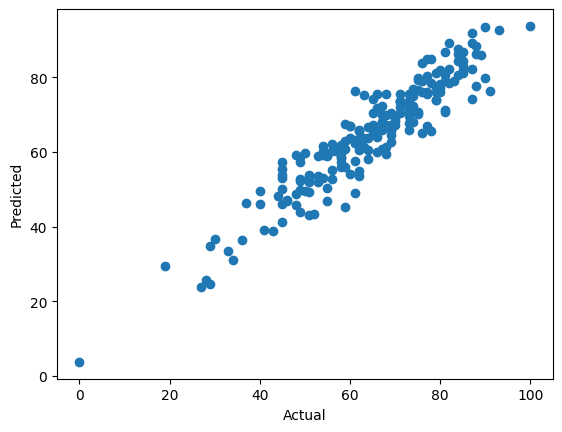

In [20]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

<Axes: xlabel='math score'>

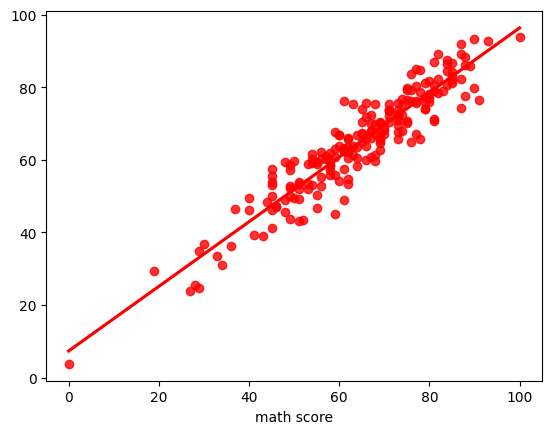

In [21]:
sns.regplot(x=y_test, y=y_pred, ci=None, color = 'red')

Difference between Actual and Predicted Values

In [22]:
pred_df = pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_pred, 'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
